# Spark Foundation Internship

# Data Science and Business Analytics

# MANOJ B

## Task 6 Prediction Using Decsision Tree

Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks.For the given ‘Iris’ dataset, I created the Decision Tree classifier and visualized it graphically. The purpose of this task is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Steps

###  Importing Libraries and DataSet
  1. Import Necessary Libraries
  2. Import Dataset
### Exploratory Data Anaysis
  3. Desriptive Statistics on Dataset
  4. Distribution on Dataset using pairplot
  5. Correlation between features .
  6. Box plots to know the distribution of each numerical feature
### Model Developement and Evaluation
  7. splitting train test data
  8. Model Developement
  9.Model Accuracy
  10.Decision Tree Graph

In [28]:
# Importing necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt


In [29]:
#importing the dataset
df = pd.read_csv('C:/New folder/Iris.csv')

In [30]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### The columns in this dataset are:

- Id
- SepalLengthCm - Length of the sepal (in cm)
- SepalWidthCm - Width of the sepal (in cm)
- PetalLengthCm - Length of the petal (in cm)
- PetalWidthCm - Width of the petal (in cm)
- Species - Species name

In [31]:
#Shape of the dataset(number of rows and columns)
df.shape

(150, 6)

In [32]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [34]:
df.describe(include='object')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


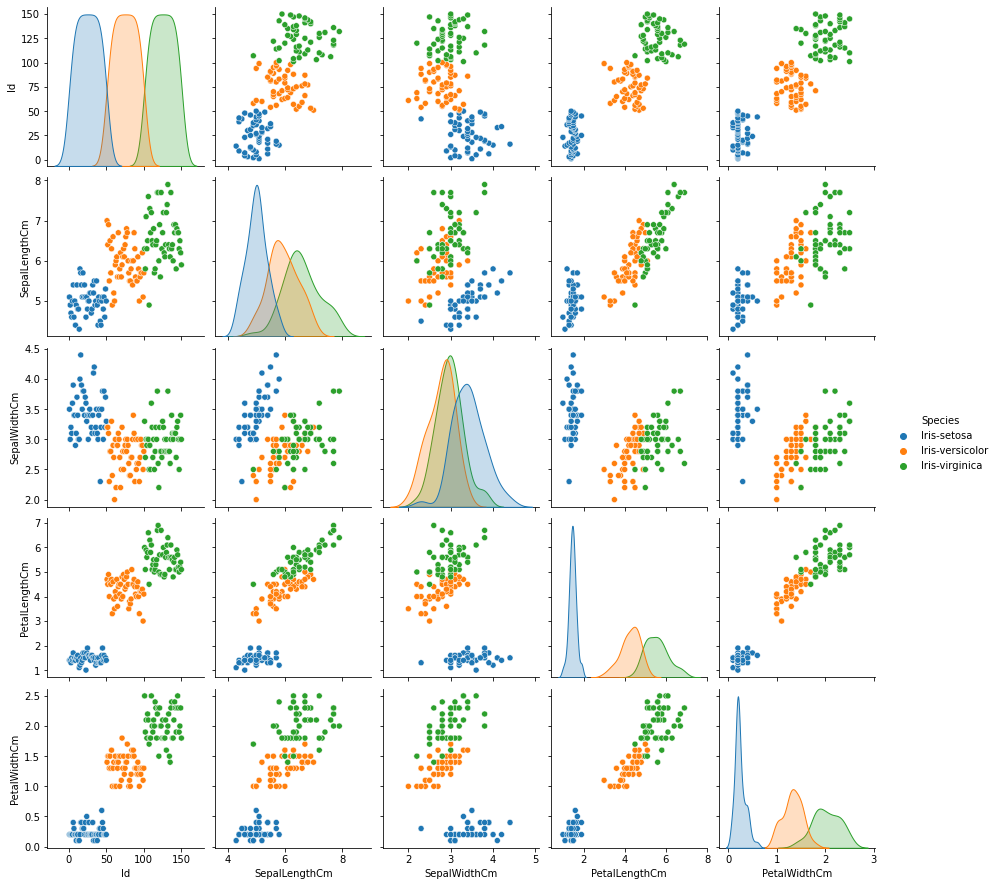

In [35]:
# Pair plot to see the distribution of the dataset
sns.pairplot(df,hue='Species')

In [36]:
#Correlation between features to using heat map

<AxesSubplot:>

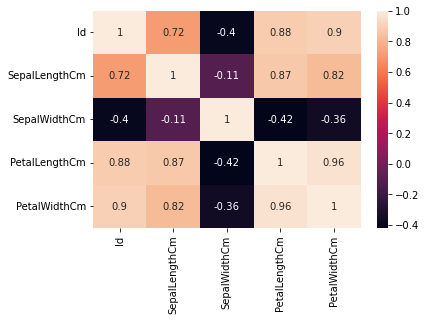

In [37]:
sns.heatmap(df.corr(),annot=True)

In [38]:
#making the target variable and dropping the column which dont have any impact on target
#i.e ID COLUMN which has id of each entry.
target=df[['Species']]
df.drop(['Id','Species'],axis=1,inplace=True)

In [39]:
df_column = list(df.columns)
df_column
target=target.reset_index()
target.drop('index',axis=1,inplace=True)

In [40]:
target

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


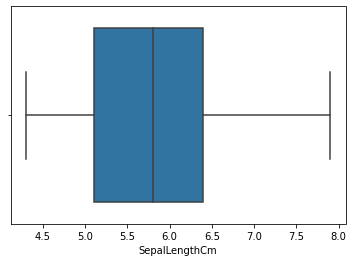

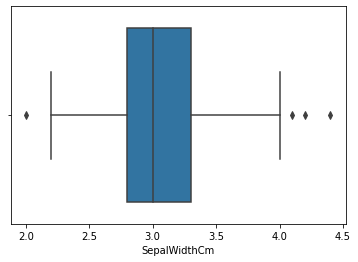

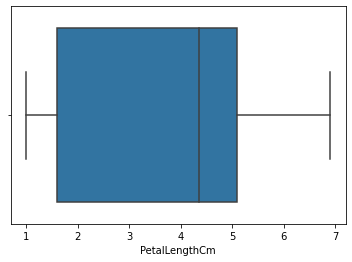

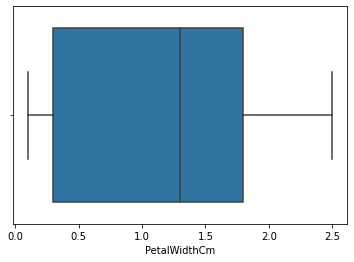

In [41]:
#Data distribution and outliers detection using box plot

for i in range(len(df_column)):
    sns.boxplot(x=df_column[i],data=df)
    plt.show()

In [42]:
target_column = list(target.columns)
target_column

['Species']

In [43]:
#Importing necessary libraries for model developement , model evaluation and splitting train,test data 

from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split

In [44]:
# Splitting train and test data
x_train,x_test,y_train,y_test= train_test_split(df,target,test_size=0.2,random_state=4)

In [45]:
# building the decision tree objec.
dt= DecisionTreeClassifier(criterion= 'entropy',splitter='best',max_depth=5)

In [46]:
# fitting the model and prediction
dt.fit(x_train,y_train)
output= dt.predict(x_test)

In [47]:
output

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [48]:
#accuracy of the model using Confusion Matrix and precision and recall score of the classification DT model.
ccuracy = accuracy_score(output,y_test)
accuracy

0.9666666666666667

In [49]:
cf = confusion_matrix(y_test,output)

<AxesSubplot:>

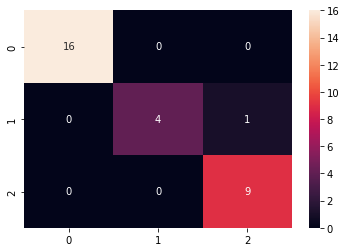

In [50]:
sns.heatmap(cf,annot=True)

In [51]:
#Visualizing the Decision Tree model using tree graph .

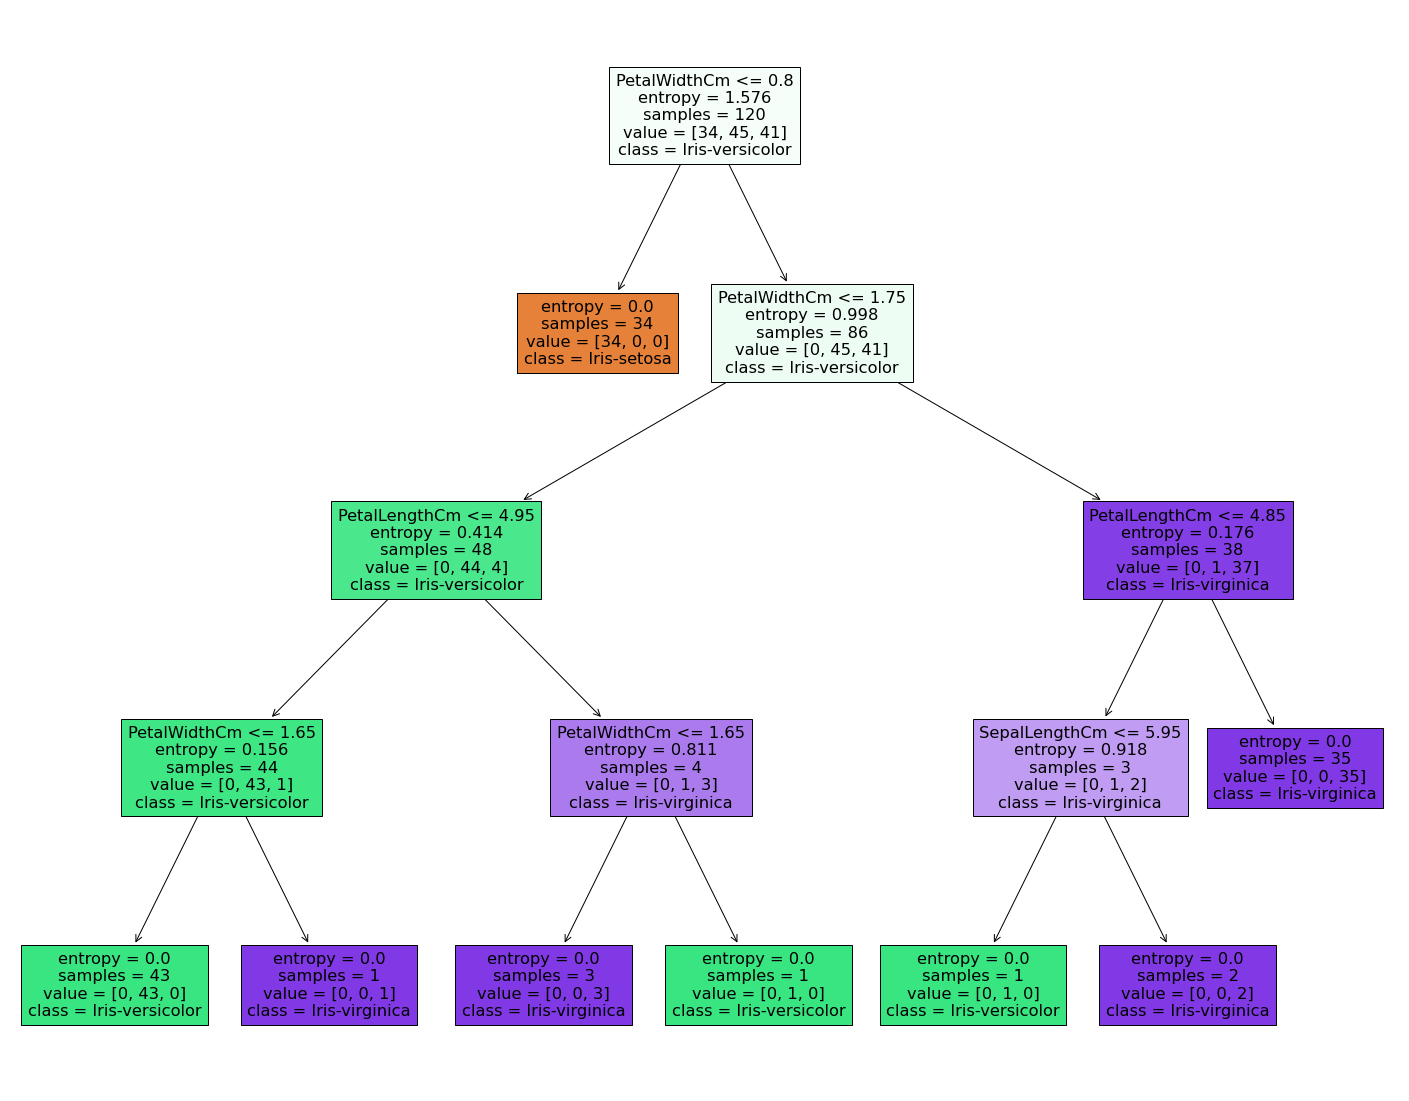

In [52]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=df_column,  
                   class_names=np.unique(target),
                   filled=True)

In [53]:
precision_score(y_test,output,average='micro')

0.9666666666666667

In [54]:
recall_score(y_test,output,average='micro')

0.9666666666666667

## Conclution

The Decision Tree algorithm for the above problem gives an accuracy of 96%.

### Pros

 - Decision trees are easy to interpret and visualize.
 - It can easily capture Non-linear patterns.
 - Don’t require any normalization.
 - Can be applied to both regression and classification problems.

### Cons

 - Sensitive to noisy data. It can overfit noisy data.
 - Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.